In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions.csv")
products = pd.read_csv("products.csv")


In [12]:
customers.shape, transactions.shape, products.shape       # to know the no of raws,columns


((5000, 13), (23814, 12), (200, 13))

In [5]:
customers.head()

,customer_id,registration_date,email,first_name,last_name,age,gender,city,province,country,postal_code,customer_segment,marketing_consent
0,CUST000000,2022-07-18,linda.johnson105@yahoo.com,Linda,Johnson,56.0,F,Barrie,BC,Canada,S6B 0C3,Bronze,False
1,CUST000001,2024-05-17,joseph.allen666@email.com,Joseph,Allen,38.0,M,Barrie,NS,Canada,H7S 4Z0,Bronze,True
2,CUST000002,2022-11-28,david_ramirez782@yahoo.com,David,Ramirez,41.0,M,London,BC,Canada,C6D 5L9,Bronze,True
3,CUST000003,2023-07-30,thomaswilliams@gmail.com,Thomas,Williams,70.0,Other,Halifax,BC,Canada,R4U 9L9,Silver,True
4,CUST000004,2021-04-04,richardjones@yahoo.com,Richard,Jones,38.0,F,Montreal,AB,Canada,D6I 7U5,Silver,True


In [8]:
customers.info()                  #explore the data
customers.isna().sum()            #show the summary (sum) of null detail as coloumn wise


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   registration_date  5000 non-null   object 
 2   email              4900 non-null   object 
 3   first_name         5000 non-null   object 
 4   last_name          5000 non-null   object 
 5   age                4950 non-null   float64
 6   gender             5000 non-null   object 
 7   city               5000 non-null   object 
 8   province           5000 non-null   object 
 9   country            5000 non-null   object 
 10  postal_code        5000 non-null   object 
 11  customer_segment   5000 non-null   object 
 12  marketing_consent  5000 non-null   bool   
dtypes: bool(1), float64(1), object(11)
memory usage: 473.8+ KB


,0
customer_id,0
registration_date,0
email,100
first_name,0
last_name,0
age,50
gender,0
city,0
province,0
country,0


In [16]:
# Change registration_date data type as datetime.
customers["registration_date"] = pd.to_datetime(customers["registration_date"])

# Change age data type as Integer.
customers["age"] = customers["age"].astype('Int64')

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        5000 non-null   object        
 1   registration_date  5000 non-null   datetime64[ns]
 2   email              4900 non-null   object        
 3   first_name         5000 non-null   object        
 4   last_name          5000 non-null   object        
 5   age                4950 non-null   Int64         
 6   gender             5000 non-null   object        
 7   city               5000 non-null   object        
 8   province           5000 non-null   object        
 9   country            5000 non-null   object        
 10  postal_code        5000 non-null   object        
 11  customer_segment   5000 non-null   object        
 12  marketing_consent  5000 non-null   bool          
dtypes: Int64(1), bool(1), datetime64[ns](1), object(10)
memory usag

The customers dataset contained mostly well-structured data. However, the registration_date column was stored as an object and was converted to a datetime format to enable time-based analysis. The age column contained missing values, which caused it to be stored as a floating-point number; this was converted to a nullable integer type for correctness.

In [23]:
# Fill age with median
customers['age'] = customers['age'].fillna(customers['age'].median())

# Fill missing emails with placeholder
customers['email'] = customers['email'].fillna('no_email_provided')

customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        5000 non-null   object        
 1   registration_date  5000 non-null   datetime64[ns]
 2   email              5000 non-null   object        
 3   first_name         5000 non-null   object        
 4   last_name          5000 non-null   object        
 5   age                5000 non-null   Int64         
 6   gender             5000 non-null   object        
 7   city               5000 non-null   object        
 8   province           5000 non-null   object        
 9   country            5000 non-null   object        
 10  postal_code        5000 non-null   object        
 11  customer_segment   5000 non-null   object        
 12  marketing_consent  5000 non-null   bool          
dtypes: Int64(1), bool(1), datetime64[ns](1), object(10)
memory usag

In [24]:
customers.head()

,customer_id,registration_date,email,first_name,last_name,age,gender,city,province,country,postal_code,customer_segment,marketing_consent
0,CUST000000,2022-07-18,linda.johnson105@yahoo.com,Linda,Johnson,56,F,Barrie,BC,Canada,S6B 0C3,Bronze,False
1,CUST000001,2024-05-17,joseph.allen666@email.com,Joseph,Allen,38,M,Barrie,NS,Canada,H7S 4Z0,Bronze,True
2,CUST000002,2022-11-28,david_ramirez782@yahoo.com,David,Ramirez,41,M,London,BC,Canada,C6D 5L9,Bronze,True
3,CUST000003,2023-07-30,thomaswilliams@gmail.com,Thomas,Williams,70,Other,Halifax,BC,Canada,R4U 9L9,Silver,True
4,CUST000004,2021-04-04,richardjones@yahoo.com,Richard,Jones,38,F,Montreal,AB,Canada,D6I 7U5,Silver,True


In [6]:
transactions.head()

,transaction_id,customer_id,transaction_date,product_id,quantity,unit_price,total_amount,discount_amount,payment_method,shipping_cost,order_status,channel
0,TXN0000013628,CUST000575,2023-09-21 15:02:53,PROD000153,1,191.62,191.62,0.00,PayPal,0.00,Completed,Website
1,TXN0000004499,CUST002669,2024-04-29 04:32:19,PROD000126,1,49.42,49.42,0.00,Apple Pay,10.24,Completed,Website
2,TXN0000012254,CUST003586,2024-05-30 12:37:47,PROD000142,1,276.48,261.37,15.11,Google Pay,0.00,Completed,Mobile App
3,TXN0000001097,CUST004454,2024-10-04 10:30:30,PROD000106,3,211.40,634.20,0.00,Google Pay,0.00,Completed,Mobile App
4,TXN0000000438,CUST000978,2024-05-24 01:09:09,PROD000037,1,67.55,67.55,0.00,PayPal,0.00,Completed,Website


In [10]:
transactions.info()
transactions.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23814 non-null  object 
 1   customer_id       23814 non-null  object 
 2   transaction_date  23814 non-null  object 
 3   product_id        23814 non-null  object 
 4   quantity          23814 non-null  int64  
 5   unit_price        23814 non-null  float64
 6   total_amount      23814 non-null  float64
 7   discount_amount   23814 non-null  float64
 8   payment_method    23814 non-null  object 
 9   shipping_cost     23814 non-null  float64
 10  order_status      23814 non-null  object 
 11  channel           23814 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 2.2+ MB


,0
transaction_id,0
customer_id,0
transaction_date,0
product_id,0
quantity,0
unit_price,0
total_amount,0
discount_amount,0
payment_method,0
shipping_cost,0


In [14]:
transactions["transaction_date"] = pd.to_datetime(transactions["transaction_date"])
transactions.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23814 non-null  object        
 1   customer_id       23814 non-null  object        
 2   transaction_date  23814 non-null  datetime64[ns]
 3   product_id        23814 non-null  object        
 4   quantity          23814 non-null  int64         
 5   unit_price        23814 non-null  float64       
 6   total_amount      23814 non-null  float64       
 7   discount_amount   23814 non-null  float64       
 8   payment_method    23814 non-null  object        
 9   shipping_cost     23814 non-null  float64       
 10  order_status      23814 non-null  object        
 11  channel           23814 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 2.2+ MB


The transactions dataset was complete with no missing values. However, the transaction_date column was initially stored as an object and was converted to a datetime format to enable time-based sales analysis. Monetary fields such as unit_price, total_amount, discount_amount, and shipping_cost were appropriately stored as numeric types.

In [17]:
transactions['calculated_total'] = (
    transactions['quantity'] * transactions['unit_price']
    - transactions['discount_amount']
    + transactions['shipping_cost']
)

(transactions['total_amount'] - transactions['calculated_total']).abs().describe()


,0
count,23814.000000
mean,1.333036
std,3.562408
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,15.000000


A validation check was performed to compare the recorded total_amount with a calculated order value derived from quantity, unit price, discounts, and shipping cost. The majority of transactions showed an exact match; however, minor discrepancies were observed in a small number of records, with a maximum difference of 15. These differences are likely due to rounding, tax calculations, or system-level adjustments. No corrections were applied to preserve the original transactional data.

In [4]:
products.head()


,product_id,product_name,category,subcategory,brand,current_price,cost_price,stock_quantity,weight_kg,launch_date,is_active,rating,review_count
0,PROD000000,TechPro Fragrance,Beauty,Fragrance,ProGear,250.63,146.88,497,14.35,2020-04-16,True,3.7,251
1,PROD000001,Classic Educational,Books,Educational,FitLife,323.46,96.82,134,9.38,2020-03-25,True,5.0,414
2,PROD000002,SmartTech Yoga,Sports,Yoga,Modern,105.91,49.61,259,12.67,2023-12-11,True,4.6,467
3,PROD000003,Classic Swimming,Sports,Swimming,SmartTech,451.12,149.95,391,10.17,2019-10-15,True,3.7,336
4,PROD000004,HomeEssentials Pants,Clothing,Pants,BeautyFirst,54.84,23.01,224,3.49,2024-06-27,True,4.4,0


In [11]:
products.info()
products.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      200 non-null    object 
 1   product_name    200 non-null    object 
 2   category        200 non-null    object 
 3   subcategory     200 non-null    object 
 4   brand           200 non-null    object 
 5   current_price   200 non-null    float64
 6   cost_price      200 non-null    float64
 7   stock_quantity  200 non-null    int64  
 8   weight_kg       200 non-null    float64
 9   launch_date     200 non-null    object 
 10  is_active       200 non-null    bool   
 11  rating          190 non-null    float64
 12  review_count    200 non-null    int64  
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 19.1+ KB


,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
current_price,0
cost_price,0
stock_quantity,0
weight_kg,0
launch_date,0


In [18]:
products["launch_date"] = pd.to_datetime(products["launch_date"])
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_id      200 non-null    object        
 1   product_name    200 non-null    object        
 2   category        200 non-null    object        
 3   subcategory     200 non-null    object        
 4   brand           200 non-null    object        
 5   current_price   200 non-null    float64       
 6   cost_price      200 non-null    float64       
 7   stock_quantity  200 non-null    int64         
 8   weight_kg       200 non-null    float64       
 9   launch_date     200 non-null    datetime64[ns]
 10  is_active       200 non-null    bool          
 11  rating          190 non-null    float64       
 12  review_count    200 non-null    int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 19.1+ KB


 The launch_date column was initially stored as an object and was converted to a datetime format.

In [26]:
# Fill missing ratings with median
products["rating"] = products["rating"].fillna(products["rating"].median())


In [29]:
df = transactions.merge(customers, on="customer_id", how="left") \
                 .merge(products, on="product_id", how="left")

df.head()
#df.info()

,transaction_id,customer_id,transaction_date,product_id,quantity,unit_price,total_amount,discount_amount,payment_method,shipping_cost,...,subcategory,brand,current_price,cost_price,stock_quantity,weight_kg,launch_date,is_active,rating,review_count
0,TXN0000013628,CUST000575,2023-09-21 15:02:53,PROD000153,1,191.62,191.62,0.00,PayPal,0.00,...,Educational,Classic,191.62,122.43,250,8.38,2019-03-30,True,3.9,22
1,TXN0000004499,CUST002669,2024-04-29 04:32:19,PROD000126,1,49.42,49.42,0.00,Apple Pay,10.24,...,Kitchen Tools,ActiveWear,49.42,15.74,223,8.26,2022-05-17,False,3.4,495
2,TXN0000012254,CUST003586,2024-05-30 12:37:47,PROD000142,1,276.48,261.37,15.11,Google Pay,0.00,...,Haircare,ProGear,276.48,103.88,119,2.44,2022-08-12,True,3.5,262
3,TXN0000001097,CUST004454,2024-10-04 10:30:30,PROD000106,3,211.40,634.20,0.00,Google Pay,0.00,...,Jackets,Deluxe,211.40,117.82,188,8.93,2019-05-30,True,4.4,96
4,TXN0000000438,CUST000978,2024-05-24 01:09:09,PROD000037,1,67.55,67.55,0.00,PayPal,0.00,...,Bedding,StyleMax,67.55,33.36,361,8.81,2020-12-01,True,4.1,378


In [31]:
list(df.columns)

['transaction_id',
 'customer_id',
 'transaction_date',
 'product_id',
 'quantity',
 'unit_price',
 'total_amount',
 'discount_amount',
 'payment_method',
 'shipping_cost',
 'order_status',
 'channel',
 'calculated_total',
 'registration_date',
 'email',
 'first_name',
 'last_name',
 'age',
 'gender',
 'city',
 'province',
 'country',
 'postal_code',
 'customer_segment',
 'marketing_consent',
 'product_name',
 'category',
 'subcategory',
 'brand',
 'current_price',
 'cost_price',
 'stock_quantity',
 'weight_kg',
 'launch_date',
 'is_active',
 'rating',
 'review_count']

In [32]:
df["order_value"] = df["calculated_total"]


In [34]:
customer_metrics = df.groupby("customer_id").agg(
    total_spend=("order_value", "sum"),
    num_orders=("transaction_id", "nunique"),
    avg_order_value=("order_value", "mean"),
    last_purchase=("transaction_date", "max")
).reset_index()

customer_metrics.head()

,customer_id,total_spend,num_orders,avg_order_value,last_purchase
0,CUST000000,1200.20,4,300.050000,2024-09-22 17:48:56
1,CUST000002,278.71,3,92.903333,2024-10-05 10:55:13
2,CUST000003,835.86,4,208.965000,2024-08-24 20:42:57
3,CUST000004,2498.89,12,208.240833,2024-11-24 20:27:19
4,CUST000005,414.42,1,414.420000,2024-08-29 18:13:12


In [ ]:
customer_metrics.describe()

In [ ]:
df[["total_amount", "discount_amount", "shipping_cost", "calculated_total"]].head()


I used calculated_total as the primary revenue metric, as it reflects the final transaction value after discounts and shipping, providing a more accurate representation of customer spend.

In [41]:
customer_metrics["days_since_last_purchase"] = (
    df["transaction_date"].max() - customer_metrics["last_purchase"]
).dt.days


calculated days since last purchase to measure customer recency, which helps distinguish active customers from inactive or potentially churned customers.

Part-2 Basic Customer Segmentation

In [46]:
def segment_customer(row):
    if row["total_spend"] >= 2000 and row["num_orders"] >= 8:
        return "High-Value Loyal"
    elif row["total_spend"] >= 500:
        return "High-Value Occasional"
    elif row["days_since_last_purchase"] <= 30:
        return "Active Customer"
    elif row["num_orders"] >= 3:
        return "Frequent Low-Spend"
    else:
        return "Low-Value"

customer_metrics["segment"] = customer_metrics.apply(segment_customer, axis=1)
customer_metrics["segment"].value_counts()


,count
segment,
High-Value Occasional,1614
Low-Value,1222
High-Value Loyal,678
Frequent Low-Spend,112
Active Customer,63


In [47]:
segment_summary = customer_metrics.groupby("segment").agg(
    customers=("customer_id", "count"),
    avg_spend=("total_spend", "mean"),
    avg_orders=("num_orders", "mean")
).reset_index()

segment_summary


,segment,customers,avg_spend,avg_orders
0,Active Customer,63,287.129365,1.952381
1,Frequent Low-Spend,112,389.667589,3.223214
2,High-Value Loyal,678,5342.852124,21.582596
3,High-Value Occasional,1614,1132.561177,4.402107
4,Low-Value,1222,242.671227,1.302782


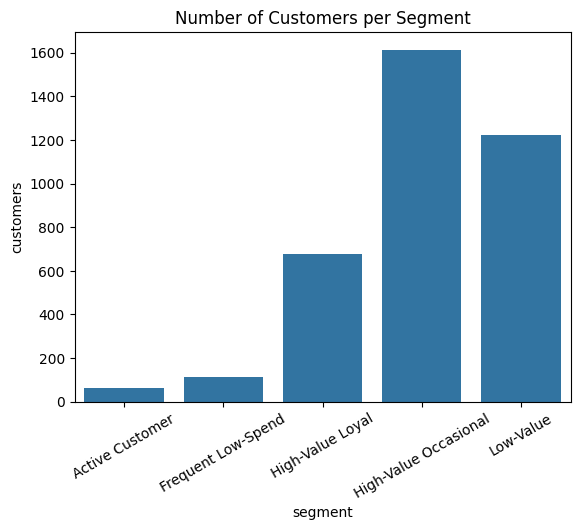

In [48]:
sns.barplot(data=segment_summary, x="segment", y="customers")
plt.title("Number of Customers per Segment")
plt.xticks(rotation=30)
plt.show()


The majority of customers fall into the High-Value Occasional and Low-Value segments, indicating that many customers either purchase infrequently or spend limited amounts. High-Value Loyal customers form a smaller but important group, characterized by both high spend and frequent purchases. Frequent Low-Spend and Active customers represent niche segments with distinct behaviors and potential for targeted engagement strategies.

Part-3 Basic Sales Analsis

In [50]:
# Sales trend over time
sales_over_time = df.groupby(
    df["transaction_date"].dt.to_period("M")
).agg(
    revenue=("order_value", "sum"),
    orders=("transaction_id", "nunique")
).reset_index()


In [51]:
sales_over_time["transaction_date"] = sales_over_time["transaction_date"].astype(str)


Revenue over time was calculated using the final transaction value (calculated_total), ensuring that discounts and shipping costs were reflected in total sales.

In [55]:
sales_over_time.head()



,transaction_date,revenue,orders
0,2023-01,264095.72,1068
1,2023-02,242880.34,1007
2,2023-03,250690.00,1050
3,2023-04,239593.26,1002
4,2023-05,257813.32,1076


In [54]:
sales_over_time.tail()


,transaction_date,revenue,orders
19,2024-08,269372.54,1083
20,2024-09,250186.30,1021
21,2024-10,259242.55,1079
22,2024-11,175529.85,713
23,2024-12,184609.62,772


To Make sure:
*   Revenue is not all zero
*   Dates increase over time

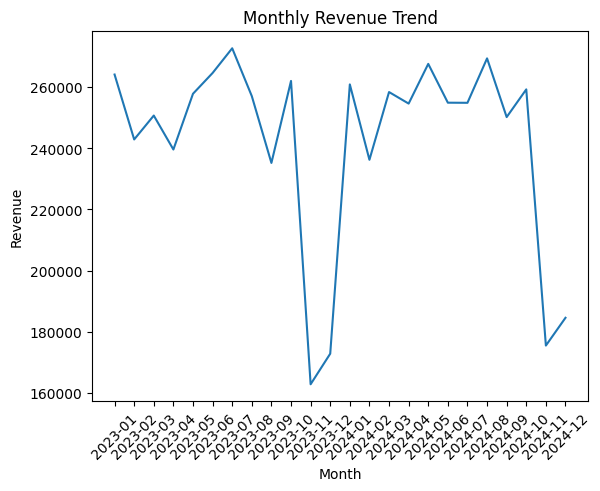

In [57]:
sns.lineplot(
    data=sales_over_time,
    x="transaction_date",
    y="revenue"
)

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


Total revenue shows a largely stable trend over time, with most months falling within a consistent range. This suggests predictable sales performance and steady customer demand. A notable dip appears toward the end of 2023, followed by a recovery in early 2024, indicating a likely temporary disruption rather than a long-term decline. A similar drop is observed in the most recent months, which may be due to incomplete data for the latest period rather than an actual decrease in sales.

In [60]:
# Best Revenue product category
category_perf = df.groupby("category").agg(
    revenue=("order_value", "sum"),
    orders=("transaction_id", "nunique")
).reset_index().sort_values("revenue", ascending=False)

category_perf


,category,revenue,orders
4,Home,1959139.13,5333
1,Books,1104045.49,6306
3,Electronics,957162.05,3909
2,Clothing,705875.77,3907
5,Sports,692567.49,2792
0,Beauty,389893.71,1558


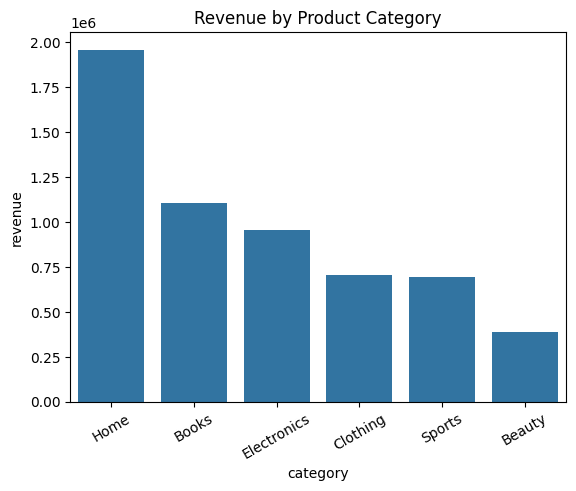

In [61]:
sns.barplot(data=category_perf, x="category", y="revenue")
plt.title("Revenue by Product Category")
plt.xticks(rotation=30)
plt.show()


Sales data also indicates noticeable peak periods that vary by product category. Several categories reach their highest sales during mid-year months, while others peak earlier or later in the year. This variation highlights the presence of category-specific seasonality rather than a single peak period across the business.

In [64]:
# Peak sales period
df["month"] = df["transaction_date"].dt.month

peak_sales = df.groupby("month").agg(
    revenue=("order_value", "sum")
).reset_index()

peak_sales



,month,revenue
0,1,524954.42
1,2,479119.86
2,3,509060.76
3,4,494191.42
4,5,525388.06
5,6,519493.93
6,7,527527.63
7,8,526413.29
8,9,485396.51
9,10,521237.96


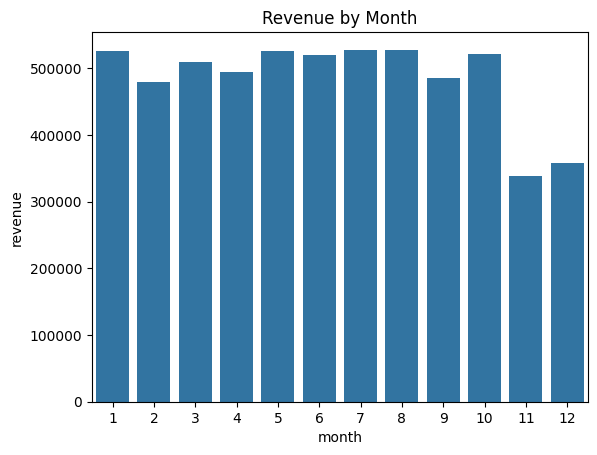

In [65]:
sns.barplot(data=peak_sales, x="month", y="revenue")
plt.title("Revenue by Month")
plt.show()

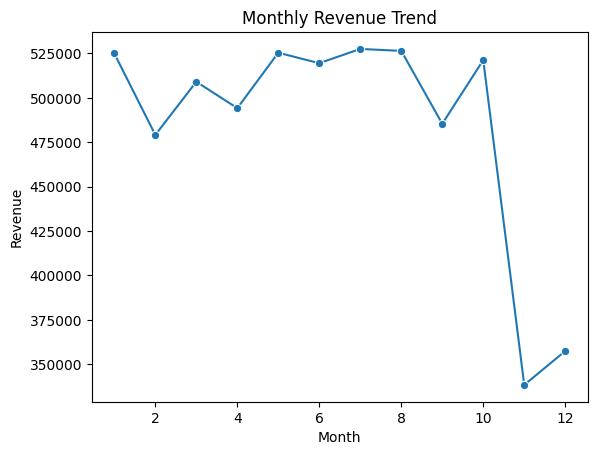

In [66]:
sns.lineplot(
    data=peak_sales,
    x="month",
    y="revenue",
    marker="o"
)

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [68]:
df["year"] = df["transaction_date"].dt.year
df["month"] = df["transaction_date"].dt.month

category_month_sales = df.groupby(
    ["category", "year", "month"]
).agg(
    revenue=("order_value", "sum"),
    orders=("transaction_id", "nunique")
).reset_index()

category_month_sales.head()



,category,year,month,revenue,orders
0,Beauty,2023,1,17963.89,79
1,Beauty,2023,2,20780.63,79
2,Beauty,2023,3,16384.36,71
3,Beauty,2023,4,14549.49,69
4,Beauty,2023,5,16352.71,72


In [69]:
# Find the peak month per category
peak_month_by_category = (
    category_month_sales
    .sort_values("revenue", ascending=False)
    .groupby("category")
    .first()
    .reset_index()
)

peak_month_by_category


,category,year,month,revenue,orders
0,Beauty,2023,2,20780.63,79
1,Books,2023,7,55064.76,306
2,Clothing,2023,8,36001.10,183
3,Electronics,2023,3,47524.68,195
4,Home,2023,7,97925.37,265
5,Sports,2023,1,36746.28,137


In [71]:
import calendar

peak_month_by_category["month_name"] = peak_month_by_category["month"].apply(
    lambda x: calendar.month_name[x]
)


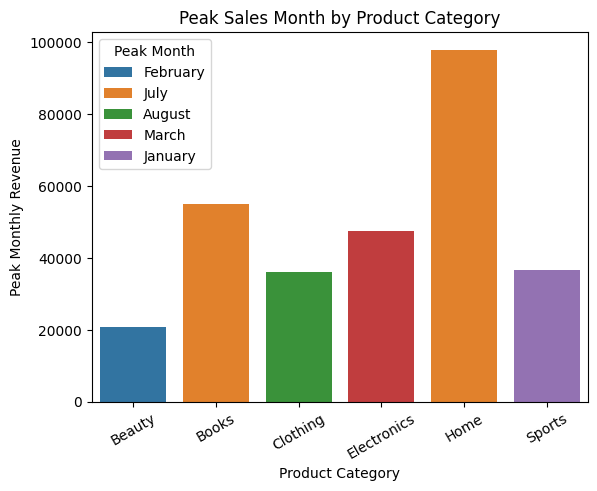

In [72]:
sns.barplot(
    data=peak_month_by_category,
    x="category",
    y="revenue",
    hue="month_name"
)

plt.title("Peak Sales Month by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Peak Monthly Revenue")
plt.xticks(rotation=30)
plt.legend(title="Peak Month")
plt.show()


Sales peaks vary by product category, which presents an opportunity to take a more targeted approach. Instead of running the same promotions across all products, the business should tailor marketing efforts, inventory planning, and pricing decisions to the peak sales period of each category. Aligning actions with when customers are most likely to buy can help increase revenue while reducing excess inventory and missed sales opportunities.

In [78]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 24, 34, 44, 54, 64, 100],
    labels=["<25", "25–34", "35–44", "45–54", "55–64", "65+"]
)
age_sales = df.groupby("age_group").agg(
    revenue=("order_value", "sum"),
    orders=("transaction_id", "nunique"),
    avg_order_value=("order_value", "mean")
).reset_index()

age_sales


/tmp/ipython-input-2670348588.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby("age_group").agg(


,age_group,revenue,orders,avg_order_value
0,<25,548699.16,2256,243.002285
1,25–34,1249684.12,5127,243.698151
2,35–44,906222.14,3746,241.723697
3,45–54,912213.04,3765,242.223324
4,55–64,1109838.05,4509,246.029273
5,65+,1082027.13,4400,245.803528


Sales performance varies meaningfully by age group. Mid-age and older customers generate the majority of revenue, primarily due to higher purchase frequency rather than larger order sizes. Average order value remains consistent across age groups, suggesting that increasing engagement and repeat purchases among younger customers represents a potential growth opportunity.

In [80]:
category_age_sales = df.groupby(
    ["category", "age_group"]
).agg(
    revenue=("order_value", "sum"),
    orders=("transaction_id", "nunique")
).reset_index()

category_age_sales.head()


/tmp/ipython-input-3786708065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_age_sales = df.groupby(


,category,age_group,revenue,orders
0,Beauty,<25,39692.68,156
1,Beauty,25–34,86909.03,352
2,Beauty,35–44,64986.63,250
3,Beauty,45–54,56618.45,234
4,Beauty,55–64,67695.15,267


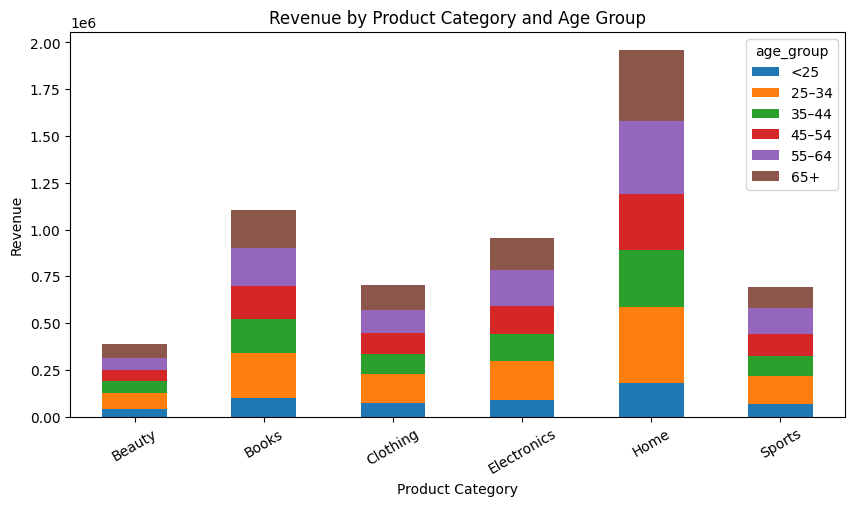

In [83]:
category_age_pivot.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Revenue by Product Category and Age Group")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=30)
plt.show()


Customer spending varies meaningfully by age group across product categories. Revenue generally increases with age, with mid-age and older customers contributing the largest share across most categories. Certain categories, such as Home and Electronics, show particularly strong concentration among older age groups, suggesting that customer demographics play an important role in category performance.